In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from queue import PriorityQueue

# Read Data

In [2]:
df = pd.read_csv('tubedata.csv', quotechar = '"', skipinitialspace = True)

# Clean up and add col names

In [3]:
col_row = df.columns.values
df.columns = ['start', 'end', 'line', 'time', 'zone', 'zone_2']
df.loc[-1] = col_row
df.index = df.index + 1
df = df.sort_index()

## Changing alphabetical zones to numbers

In [4]:
df.loc[df.zone=='d', 'zone'] = 9
df.loc[df.zone=='c', 'zone'] = 8
df.loc[df.zone=='b', 'zone'] = 7
df.loc[df.zone=='a', 'zone'] = 7

# Graph

In [5]:
G = nx.from_pandas_edgelist(df, 'start', 'end', ['time', 'line', 'zone'], create_using=nx.Graph())

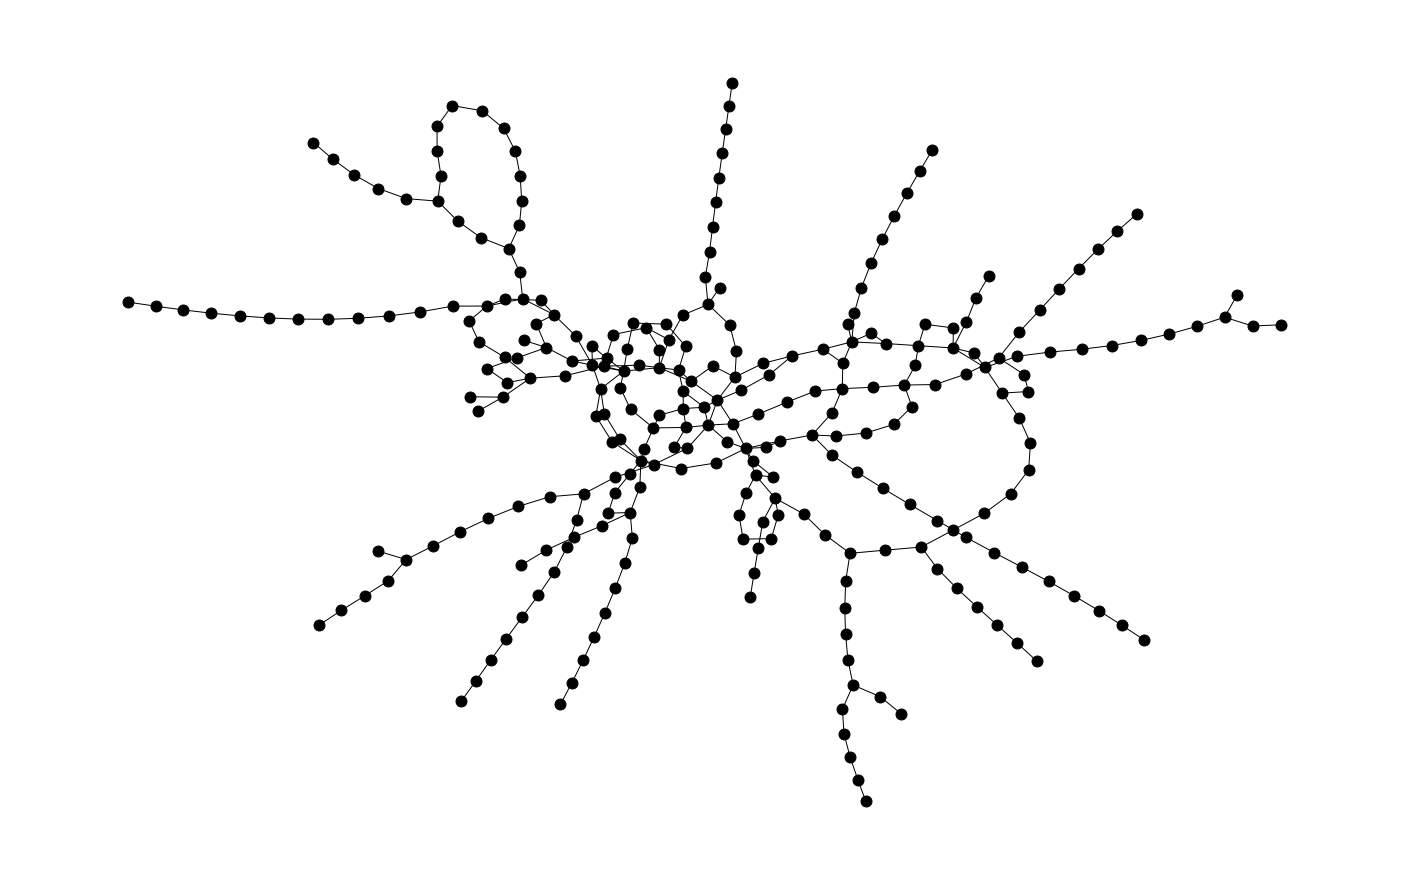

In [6]:
fig, ax = plt.subplots(figsize=(25,16))

nx.draw_kamada_kawai(G, node_size=120, node_color = 'black')

In [9]:
print(G)

Graph with 271 nodes and 313 edges


# Plotting path

In [124]:
def plot_path(G, path):
    
    # Dataframe for path
    path_df = pd.DataFrame(G.nodes, columns = ['station'])

    # Default color and size
    path_df['color'] = "#000000"
    path_df['size'] = 80
        
    # Marking nodes in the path with colors
    for n in path:
        if n == path[0]: # Start Node
            col = "#006400" # Color Green
            size = 250
        elif n == path[-1]: # End Node
            col = "#FF0000" # Color Red
            size = 250
        else: # The rest of the path
            col = "#0000FF" # Color Blue
            size = 150

        path_df.loc[path_df.station==n, 'color'] = col
        path_df.loc[path_df.station==n, 'size'] = size
        
    fig, ax = plt.subplots(figsize=(25,16))
    nx.draw_kamada_kawai(G, node_size=path_df['size'].values, node_color = path_df['color'].values)

# Define Start and Goal state

In [229]:
start = "West Ruislip"
goal = "Epping"

# DFS

In [230]:
# Your function implementing DFS
def construct_path_from_root(node, root):
    
    path_from_root = [node['label']]
    while node['parent']:
        node = node['parent']
        path_from_root = [node['label']] + path_from_root
    return path_from_root


def my_depth_first_graph_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    
    frontier = [{'label':initial, 'parent':None, 'cost': 0}]  
    explored = {initial}
    number_of_explored_nodes = 1 

    while frontier:
        node = frontier.pop() # pop from the right of the list
        number_of_explored_nodes += 1
        if node['label']==goal:
            if compute_exploration_cost:
                print('number of explorations = {}'.format(number_of_explored_nodes))
                print('Time taken from Start to Goal =', node['cost'], 'minutes')
            return node

        neighbours = reversed(list(nxobject.neighbors(node['label']))) if reverse else nxobject.neighbors(node['label'])
        for child_label in neighbours:

            child = {'label':child_label, 'parent':node, 'cost': int(node['cost']) + int(nxobject[node['label']][child_label]['time'])}
            if child_label not in explored:
                frontier.append(child) # added to the right of the list, so it is a LIFO
                explored.add(child_label)      
    return None

In [231]:
solution = my_depth_first_graph_search(G, start, goal, True)

number of explorations = 174
Time taken from Start to Goal = 172 minutes


In [232]:
path = construct_path_from_root(solution, start)
print(path)
print("\nNumber of stations travelled =", len(path))

['West Ruislip', 'Ruislip Gardens', 'South Ruislip', 'Northolt', 'Greenford', 'Perivale', 'Hanger Lane', 'North Acton', 'East Acton', 'White City', "Shepherd's Bush", 'Latimer Road', 'Ladbroke Grove', 'Westbourne Park', 'Royal Oak', 'Paddington', 'Bayswater', 'Notting Hill Gate', 'High Street Kensington', "Earls' Court", 'Barons Court', 'Hammersmith', 'Turnham Green', 'Acton Town', 'Ealing Common', 'North Ealing', 'Park Royal', 'Alperton', 'Sudbury Town', 'Sudbury Hill', 'South Harrow', 'Rayners Lane', 'West Harrow', 'Harrow-on-the-Hill', 'Northwick Park', 'Preston Road', 'Wembley Park', 'Finchley Road', 'Baker Street', 'Bond Street', 'Green Park', 'Victoria', 'Pimlico', 'Vauxhall', 'Stockwell', 'Oval', 'Kennington', 'Elephant & Castle', 'Borough', 'London Bridge', 'Bank/Monument', 'Tower Hill', 'Aldgate East', 'Whitechapel', 'Shadwell', 'Wapping', 'Rotherhithe', 'Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford', 'Leyton', 'Leytonstone', 'Snares

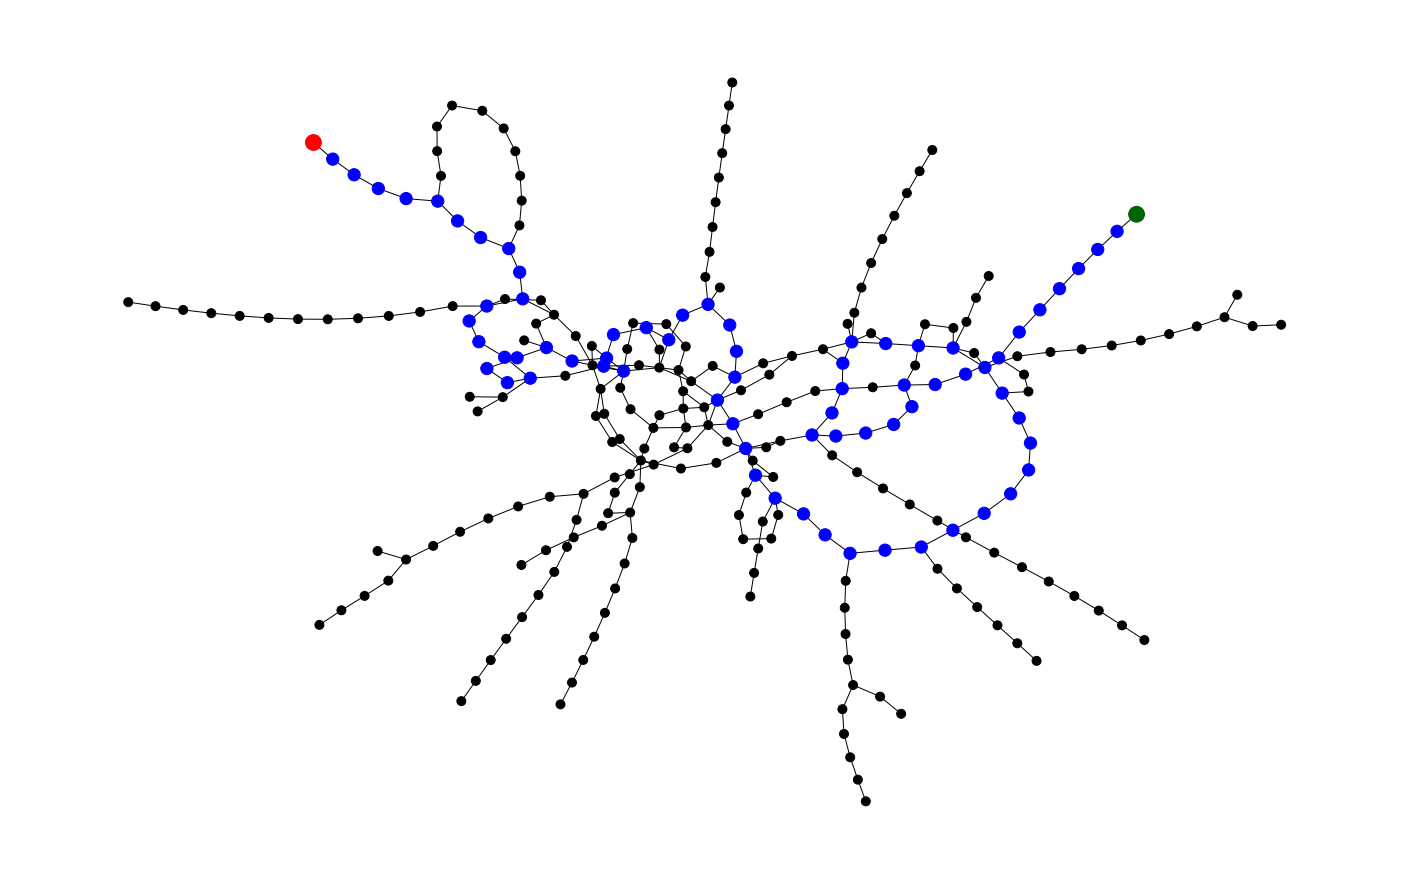

In [233]:
plot_path(G, path)

#### Reverse Implementation

In [234]:
solution = my_depth_first_graph_search(G, start, goal, True, True)

number of explorations = 101
Time taken from Start to Goal = 146 minutes


In [235]:
path = construct_path_from_root(solution, start)
print(path)
print("\nNumber of stations travelled =", len(path))

['West Ruislip', 'Ruislip Gardens', 'South Ruislip', 'Northolt', 'Greenford', 'Perivale', 'Hanger Lane', 'North Acton', 'West Acton', 'Ealing Broadway', 'Ealing Common', 'Acton Town', 'Turnham Green', 'Hammersmith', 'Barons Court', "Earls' Court", 'High Street Kensington', 'Notting Hill Gate', 'Holland Park', "Shepherd's Bush", 'Latimer Road', 'Ladbroke Grove', 'Westbourne Park', 'Royal Oak', 'Paddington', 'Edgware Road', 'Baker Street', "Regent's Park", 'Oxford Circus', 'Piccadilly Circus', 'Charing Cross', 'Embankment', 'Waterloo', 'Lambeth North', 'Elephant & Castle', 'Borough', 'London Bridge', 'Bermondsey', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Aldgate East', 'Liverpool Street', 'Bethnal Green', 'Mile End', 'Stratford', 'Leyton', 'Leytonstone', 'Wanstead', 'Redbridge', 'Gants Hill', 'Newbury Park', 'Barkingside', 'Fairlop', 'Hainault', 'Grange Hill', 'Chigwell', 'Roding Valley', 'Woodford', 'Buckhurst Hill', 'Loughton', 'Debden', 'Theydon Bois', 'Ep

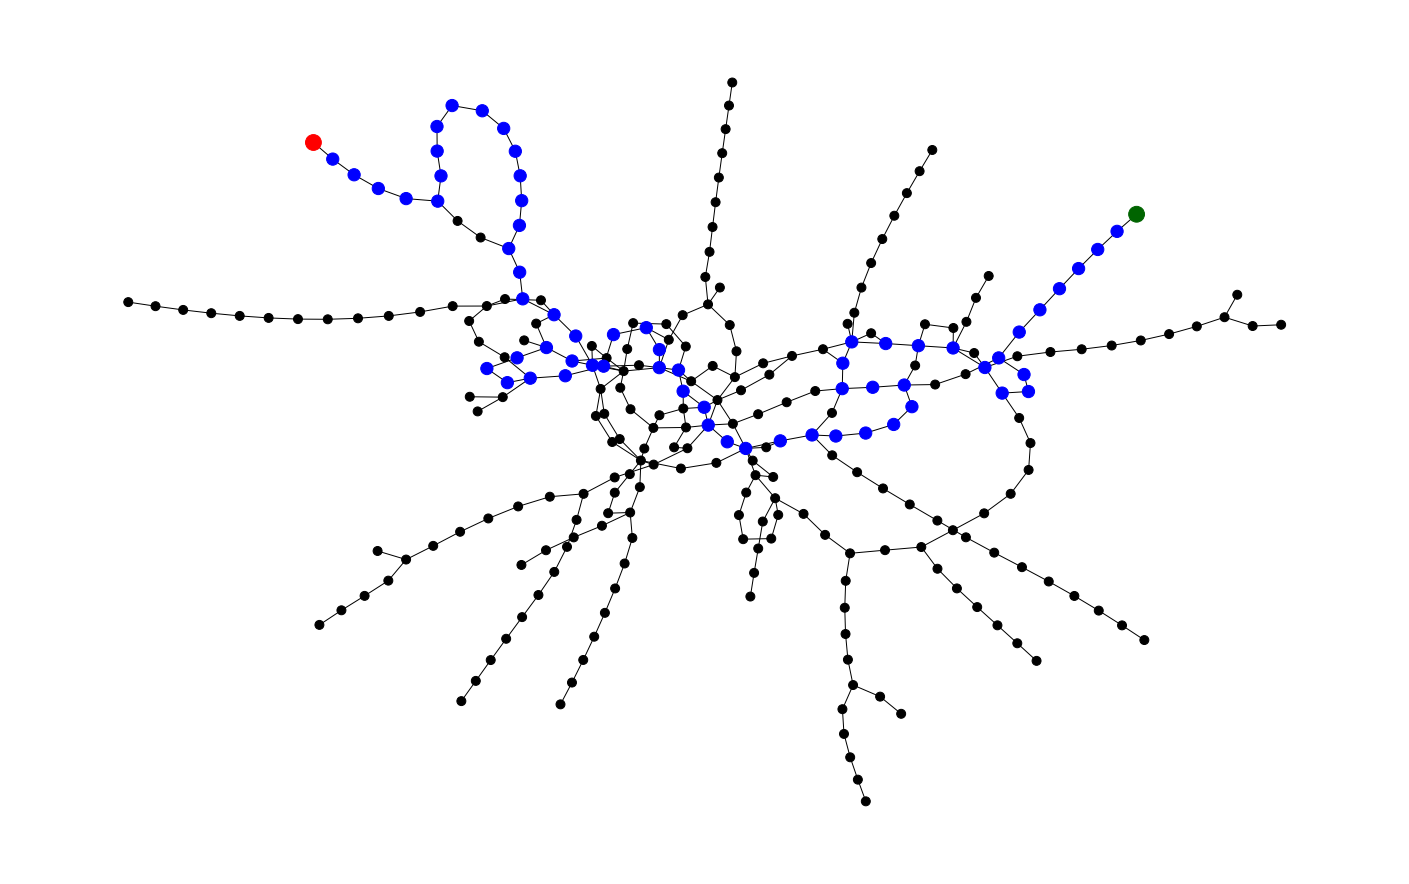

In [236]:
plot_path(G, path)

# BFS

In [237]:
# Your function implmenting BFS

def my_breadth_first_graph_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    
    if initial == goal: # just in case, because now we are checking the children
        return None
    
    number_of_explored_nodes = 1    
    frontier = [{'label':initial, 'parent':None, 'cost': 0}]  
    # FIFO queue should NOT be implemented with a list, this is slow! better to use deque
    explored = {initial}
    
    while frontier:
        node = frontier.pop() # pop from the right of the list
        
        neighbours = reversed(list(nxobject.neighbors(node['label']))) if reverse else nxobject.neighbors(node['label'])

        for child_label in neighbours:
            child = {'label':child_label, 'parent':node, 'cost': int(node['cost']) + int(nxobject[node['label']][child_label]['time'])}
            if child_label==goal:
                if compute_exploration_cost:
                    print('number of explorations = {}'.format(number_of_explored_nodes))
                    print('Time taken from Start to Goal =', int(node['cost']) + int(nxobject[node['label']][child_label]['time']), 'minutes')
                return child
 
            if child_label not in explored:
                frontier = [child] + frontier # added to the left of the list, so a FIFO!
                number_of_explored_nodes += 1
                explored.add(child_label)
            
    return None

In [238]:
# You can call your function like this: 
solution = my_breadth_first_graph_search(G, start, goal, True)
path = construct_path_from_root(solution, start)
print("\nNumber of stations travelled =", len(path))
print(path)

number of explorations = 266
Time taken from Start to Goal = 79 minutes

Number of stations travelled = 35
['West Ruislip', 'Ruislip Gardens', 'South Ruislip', 'Northolt', 'Greenford', 'Perivale', 'Hanger Lane', 'North Acton', 'East Acton', 'White City', "Shepherd's Bush", 'Holland Park', 'Notting Hill Gate', 'Queensway', 'Lancaster Gate', 'Marble Arch', 'Bond Street', 'Green Park', 'Westminster', 'Waterloo', 'Bank/Monument', 'Liverpool Street', 'Bethnal Green', 'Mile End', 'Stratford', 'Leyton', 'Leytonstone', 'Snaresbrook', 'South Woodford', 'Woodford', 'Buckhurst Hill', 'Loughton', 'Debden', 'Theydon Bois', 'Epping']


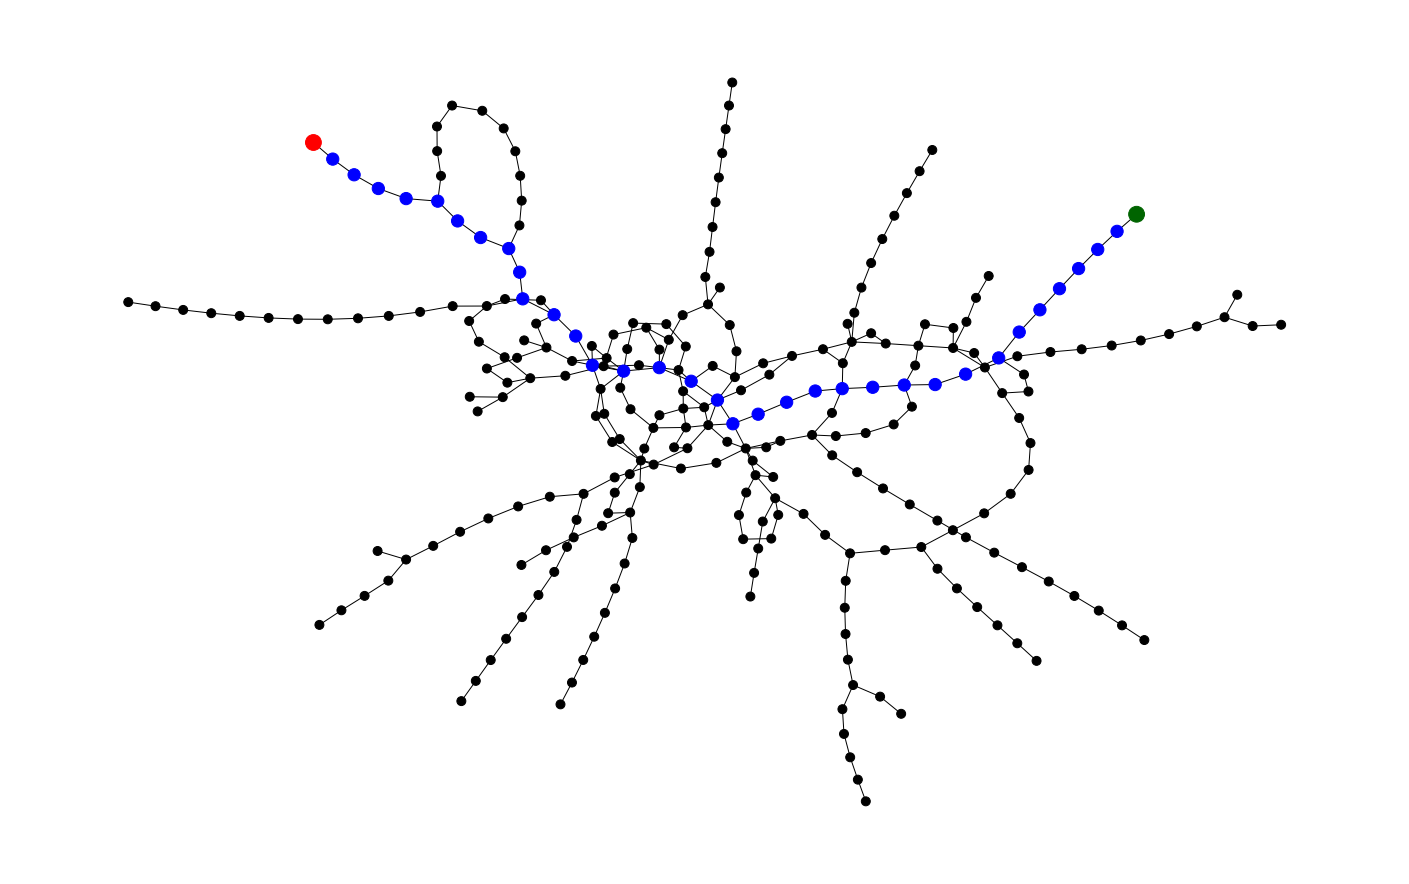

In [239]:
plot_path(G, path)

#### Reverse Implementation

In [240]:
# You can call your function like this: 
solution = my_breadth_first_graph_search(G, start, goal, True, True)
path = construct_path_from_root(solution, start)
print("\nNumber of stations travelled =", len(path))
print(path)

number of explorations = 267
Time taken from Start to Goal = 79 minutes

Number of stations travelled = 35
['West Ruislip', 'Ruislip Gardens', 'South Ruislip', 'Northolt', 'Greenford', 'Perivale', 'Hanger Lane', 'North Acton', 'East Acton', 'White City', "Shepherd's Bush", 'Holland Park', 'Notting Hill Gate', 'Queensway', 'Lancaster Gate', 'Marble Arch', 'Bond Street', 'Green Park', 'Westminster', 'Waterloo', 'Bank/Monument', 'Liverpool Street', 'Bethnal Green', 'Mile End', 'Stratford', 'Leyton', 'Leytonstone', 'Snaresbrook', 'South Woodford', 'Woodford', 'Buckhurst Hill', 'Loughton', 'Debden', 'Theydon Bois', 'Epping']


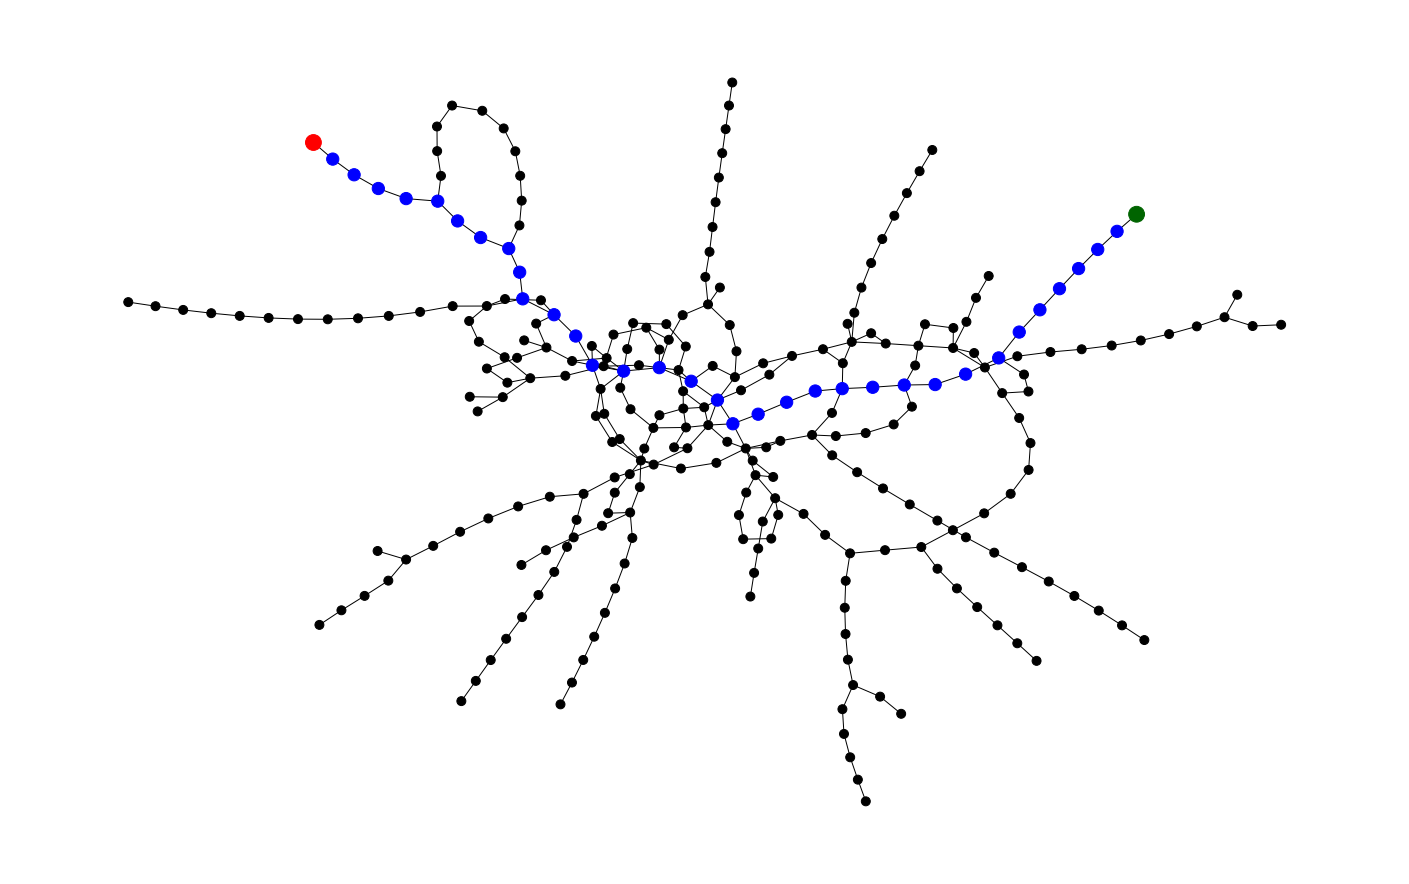

In [241]:
plot_path(G, path)

# UCS

### UCS Vanilla

In [316]:
open_list = PriorityQueue()

open_list.put((0, start, [start]))

closed_list = set()

nodes_expanded = 0

In [317]:
while not open_list.empty():

    node = open_list.get()
    while(node[1] in closed_list):
        node = open_list.get()

    if node[1] == goal:
        print('\n=============================================================')
        print('Found solution!')
        print('Path from %s to %s' % (start, goal))
        print('Total cost of %d' % node[0])    
        print( 'Final path: ', node[2])
        print("Nodes Expanded -->", nodes_expanded)
        print('=============================================================')
        
        break

    closed_list.add(node[1])

    for s in G[node[1]]:
        temp = node[2].copy()
        temp.append(s)
        open_list.put(((node[0] + int(G[node[1]][s]['time'])), s, temp))
    nodes_expanded += 1


Found solution!
Path from West Ruislip to Epping
Total cost of 78
Final path:  ['West Ruislip', 'Ruislip Gardens', 'South Ruislip', 'Northolt', 'Greenford', 'Perivale', 'Hanger Lane', 'North Acton', 'East Acton', 'White City', "Shepherd's Bush", 'Holland Park', 'Notting Hill Gate', 'Queensway', 'Lancaster Gate', 'Marble Arch', 'Bond Street', 'Oxford Circus', 'Tottenham Court Road', 'Holborn', 'Chancery Lane', "St. Paul's", 'Bank/Monument', 'Liverpool Street', 'Bethnal Green', 'Mile End', 'Stratford', 'Leyton', 'Leytonstone', 'Snaresbrook', 'South Woodford', 'Woodford', 'Buckhurst Hill', 'Loughton', 'Debden', 'Theydon Bois', 'Epping']
Nodes Expanded --> 264


In [244]:
len(node[2])

37

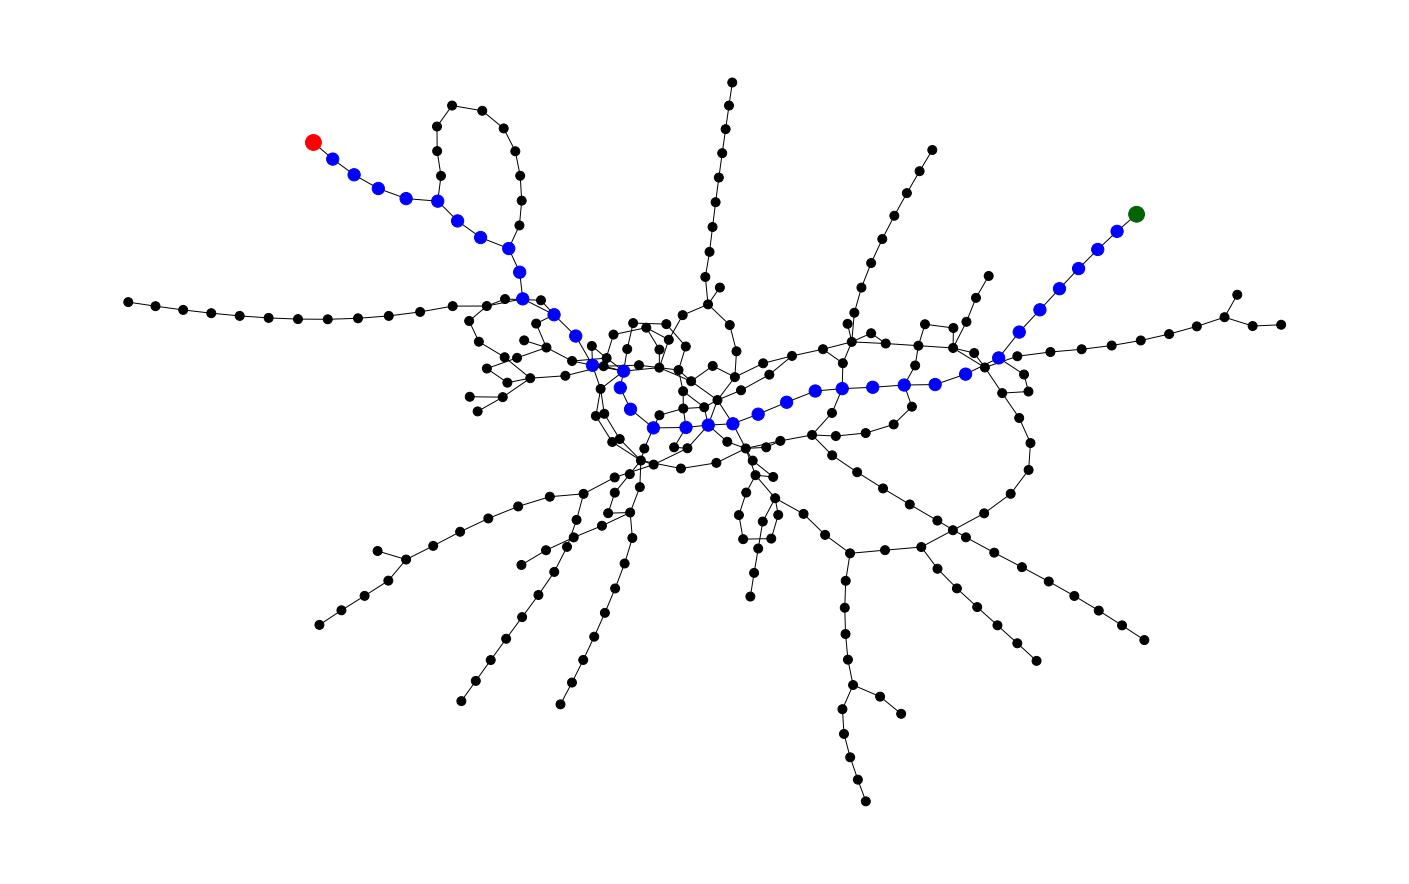

In [245]:
plot_path(G, node[2])

### UCS with +5 for line change

In [261]:
open_list = PriorityQueue()

open_list.put((0, start, [start], []))

closed_list = set()  # we use a set here to ensure no repeated entries

nodes_expanded = 0

In [262]:
nodes_expanded = 0
while not open_list.empty():

    node = open_list.get()
    while(node[1] in closed_list):
        node = open_list.get()
        
    if node[1] == goal:
        print('\n=============================================================')
        print('Found solution!')
        print('Path from %s to %s' % (start, goal))
        print('Total cost of %d' % node[0])    
        print( 'Final path: ', node[2])
        print( 'Line path: ', node[3])
        print("Nodes Expanded -->", nodes_expanded)
        print('=============================================================')
        
        break
    
    for s in G[node[1]]:
        temp = node[2].copy()
        temp.append(s)
        temp2 = node[3].copy()
        temp2.append(G[node[1]][s]['line'])

        extra_time = 0
        if len(temp2) > 1:
            if temp2[-1] != temp2[-2]:
                #print("Line changed from ", temp2[-2], " to ", temp2[-1])
                extra_time = 5

        open_list.put(((int(node[0]) + int(G[node[1]][s]['time']) + int(extra_time)), s, temp, temp2))
        #print(((node[0] + G[node[1]][s]['time'] + extra_time), s, temp, temp2))
    nodes_expanded += 1


Found solution!
Path from West Ruislip to Epping
Total cost of 78
Final path:  ['West Ruislip', 'Ruislip Gardens', 'South Ruislip', 'Northolt', 'Greenford', 'Perivale', 'Hanger Lane', 'North Acton', 'East Acton', 'White City', "Shepherd's Bush", 'Holland Park', 'Notting Hill Gate', 'Queensway', 'Lancaster Gate', 'Marble Arch', 'Bond Street', 'Oxford Circus', 'Tottenham Court Road', 'Holborn', 'Chancery Lane', "St. Paul's", 'Bank/Monument', 'Liverpool Street', 'Bethnal Green', 'Mile End', 'Stratford', 'Leyton', 'Leytonstone', 'Snaresbrook', 'South Woodford', 'Woodford', 'Buckhurst Hill', 'Loughton', 'Debden', 'Theydon Bois', 'Epping']
Line path:  ['Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Central', 'Ce

In [263]:
len(node[2])

37

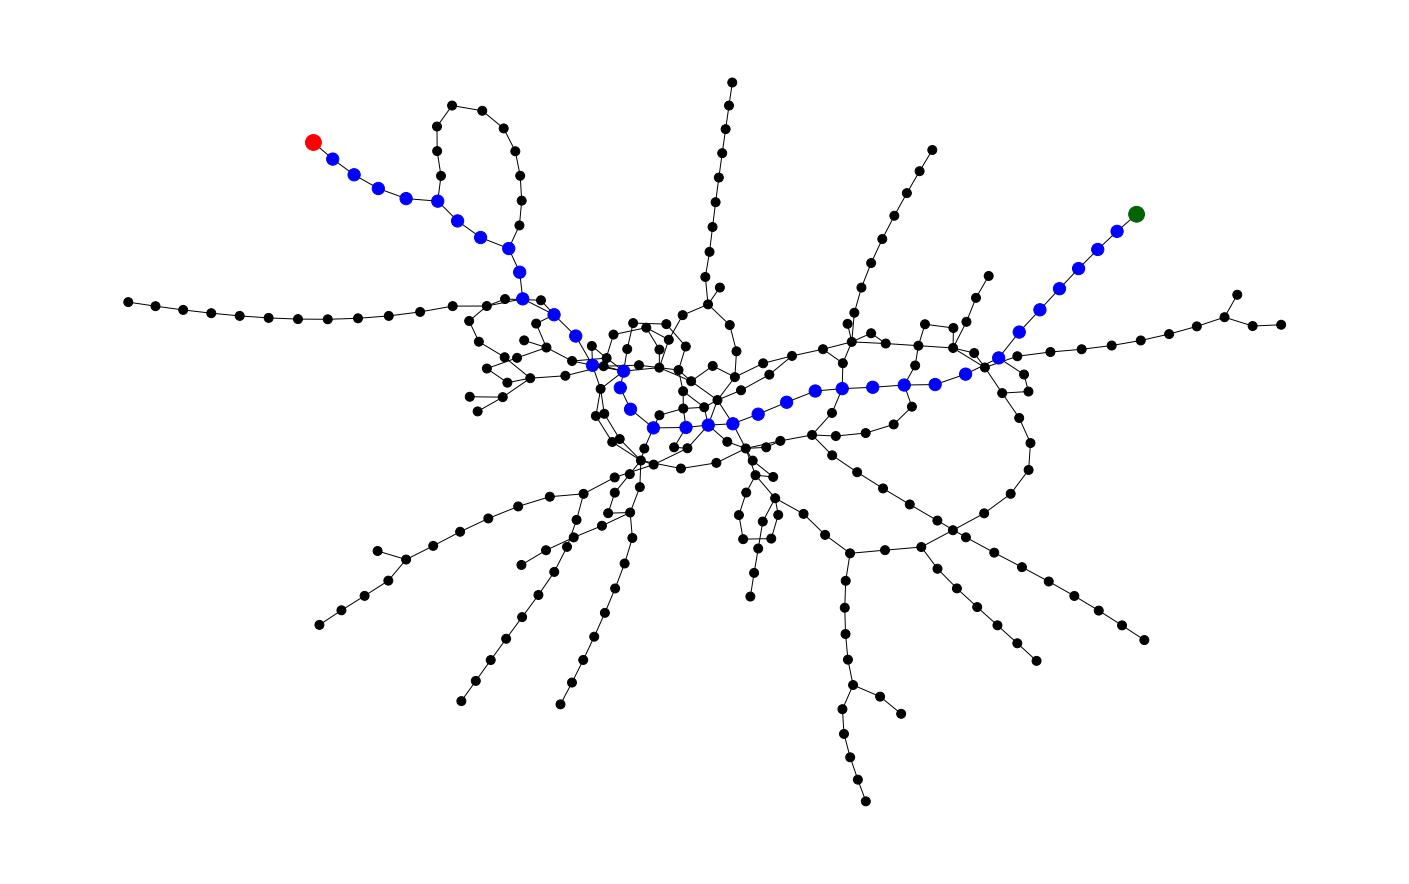

In [248]:
plot_path(G, node[2])

### UCS with +0.5 for station door opening

In [256]:
open_list = PriorityQueue()

open_list.put((0, start, [start]))

closed_list = set()  # we use a set here to ensure no repeated entries

nodes_expanded = 0

In [257]:
nodes_expanded = 0
while not open_list.empty():
        
    node = open_list.get()
    while(node[1] in closed_list):
        node = open_list.get()
    
    if node[1] == goal:
        print('\n=============================================================')
        print('Found solution!')
        print('Path from %s to %s' % (start, goal))
        print('Total cost of %d' % node[0])    
        print( 'Final path: ', node[2])
        print("Nodes Expanded -->", nodes_expanded)
        print('=============================================================')
        
        break
      
    closed_list.add(node[1])
  
    for s in G[node[1]]:
        temp = node[2].copy()
        temp.append(s)
        #print(((node[0] + G[node[1]][s]['time']), s, temp))
        open_list.put(((int(node[0]) + int(G[node[1]][s]['time']) + 1), s, temp))
    nodes_expanded += 1


Found solution!
Path from West Ruislip to Epping
Total cost of 113
Final path:  ['West Ruislip', 'Ruislip Gardens', 'South Ruislip', 'Northolt', 'Greenford', 'Perivale', 'Hanger Lane', 'North Acton', 'East Acton', 'White City', "Shepherd's Bush", 'Holland Park', 'Notting Hill Gate', 'Queensway', 'Lancaster Gate', 'Marble Arch', 'Bond Street', 'Green Park', 'Westminster', 'Waterloo', 'Bank/Monument', 'Liverpool Street', 'Bethnal Green', 'Mile End', 'Stratford', 'Leyton', 'Leytonstone', 'Snaresbrook', 'South Woodford', 'Woodford', 'Buckhurst Hill', 'Loughton', 'Debden', 'Theydon Bois', 'Epping']
Nodes Expanded --> 266


In [260]:
len(node[2])

35

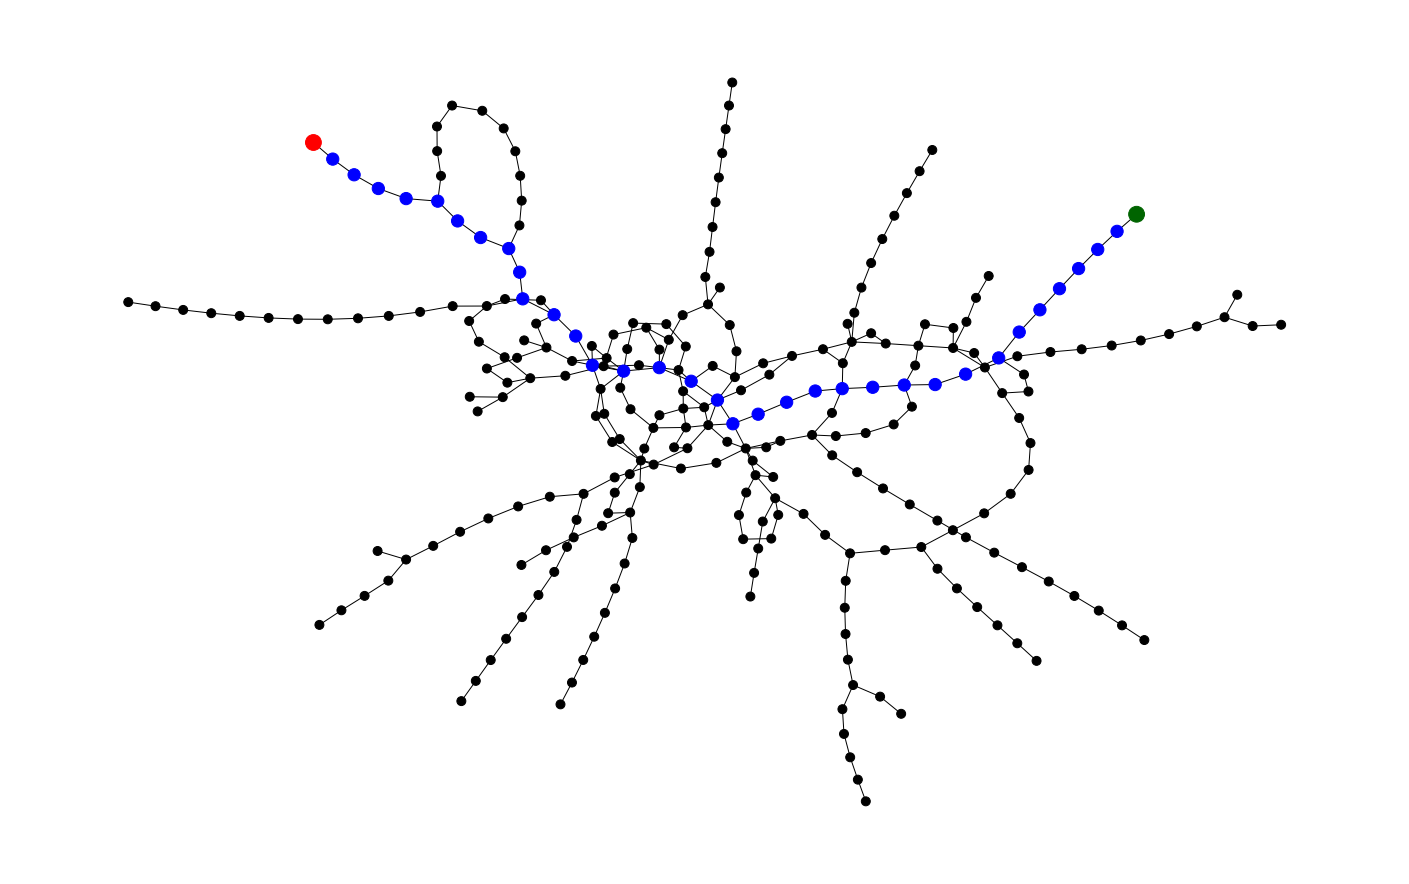

In [259]:
plot_path(G, node[2])


# Using Zones as Heuristics

In [300]:
start = 'Epping'
goal = 'Liverpool Street'

In [301]:
if df.loc[df.start==goal].shape[0] != 0:
    goal_zone = int(df.loc[df.start==goal, 'zone'].head(1).values[0])
else:
    goal_zone = int(df.loc[df.end==goal, 'zone'].head(1).values[0])

open_list = PriorityQueue()

open_list.put((0, start, [start], [], 0))

closed_list = set()  # we use a set here to ensure no repeated entries

In [302]:
nodes_expanded = 0
while not open_list.empty():
    
    node = open_list.get()
    while(node[1] in closed_list):
        node = open_list.get()
        
    if node[1] == goal:
        print('\n=============================================================')
        print('Found solution!')
        print('Path from %s to %s' % (start, goal))
        print('Total cost of %d' % node[4])    
        print( 'Final path: ', node[2])
        print( 'Line path: ', node[3])
        print("Nodes Expanded -->", nodes_expanded)
        print('=============================================================')
        
        break
    
    closed_list.add(node[1])
    
    
    for s in G[node[1]]:
        temp = node[2].copy()
        temp.append(s)
        temp2 = node[3].copy()
        temp2.append(G[node[1]][s]['zone'])

        extra_time = 0
        if len(temp2) > 1:
            if int(temp2[-1]) > goal_zone:
                extra_time = 100

        #print(((node[0] + G[node[1]][s]['time'] + extra_time), s, temp, temp2, (node[4] + G[node[1]][s]['time'])))
        open_list.put(((node[0] + int(G[node[1]][s]['time']) + extra_time), s, temp, temp2, (node[4] + int(G[node[1]][s]['time']))))
        
    nodes_expanded += 1


Found solution!
Path from Epping to Liverpool Street
Total cost of 32
Final path:  ['Epping', 'Theydon Bois', 'Debden', 'Loughton', 'Buckhurst Hill', 'Woodford', 'South Woodford', 'Snaresbrook', 'Leytonstone', 'Leyton', 'Stratford', 'Mile End', 'Bethnal Green', 'Liverpool Street']
Line path:  ['6', '6', '6', '5', '4', '4', '4', '3', '3', '3', '2', '2', '1']
Nodes Expanded --> 29


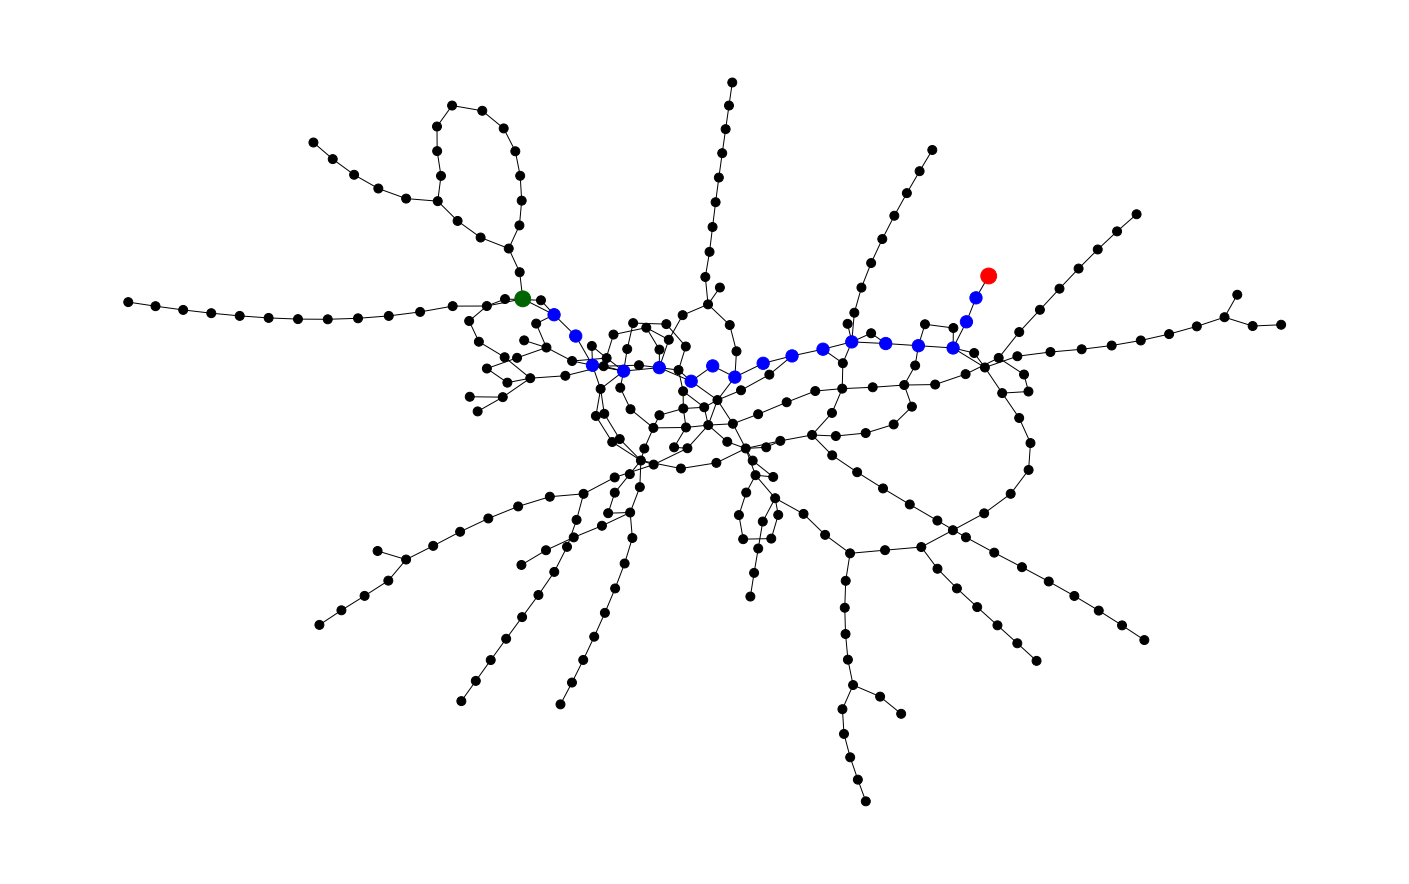

In [297]:
plot_path(G, node[2])

Either equal nodes expanded or less - based on where the goal state is. 
<br>if goal state is on the inside, node expansion is minimized

# Adding extra nodes for Lines

#### Since each node represents one station and one edge represents one line, we cannot have multiple lines between 2 nodes. Therefore, adding multiple nodes for stations with multiple lines.

First, adding the line name to the station name. Therefore getting unique station + line nodes.

In [88]:
df2 = df.copy()
df.start = df.start + '_' + df.line
df.end = df.end + '_' + df.line

In [90]:
df

,start,end,line,time,zone,zone_2
0,Harrow & Wealdstone_Bakerloo,Kenton_Bakerloo,Bakerloo,3,5,0
1,Kenton_Bakerloo,South Kenton_Bakerloo,Bakerloo,2,4,0
2,South Kenton_Bakerloo,North Wembley_Bakerloo,Bakerloo,2,4,0
3,North Wembley_Bakerloo,Wembley Central_Bakerloo,Bakerloo,2,4,0
4,Wembley Central_Bakerloo,Stonebridge Park_Bakerloo,Bakerloo,3,4,0
...,...,...,...,...,...,...
369,Victoria_Victoria,Pimlico_Victoria,Victoria,3,1,0
370,Pimlico_Victoria,Vauxhall_Victoria,Victoria,1,1,0
371,Vauxhall_Victoria,Stockwell_Victoria,Victoria,3,1,2
372,Stockwell_Victoria,Brixton_Victoria,Victoria,2,2,0


Getting all unique stations

In [89]:
only_start = set(df2.start.unique()).difference(set(df2.end.unique()))
only_end = set(df2.end.unique()).difference(set(df2.start.unique()))
both = set(df2.end.unique()).intersection(set(df2.start.unique()))
all_stations = only_start.union(both).union(only_end)

Creating a dictionary for tubelines per station

In [91]:
dicx = {}
for s in all_stations:
    starters = df2.loc[df2.start==s, 'line'].unique()
    enders = df2.loc[df2.end==s, 'line'].unique()
    all_lines_for_s = set(starters).union(set(enders))
    dicx[s] = list(all_lines_for_s)

Inserting rows with same station names (but different tubelines) with time difference as 0

In [92]:
for s in dicx.keys():
    if len(dicx[s])>1:
        print(s, len(dicx[s]))
        timex = 0
        zonex = df2.loc[df2.start=='Paddington', 'zone'].head(1).values[0]
        zonex_2 = 0
        for s2 in dicx[s]:
            startx = s + '_' + s2
            for s3 in dicx[s]:
                if s3 != s2:
                    endx = s + '_' + s3
                    linex = s2
                    df.loc[df.shape[0]] = [startx, endx, linex, timex, zonex, zonex_2]

Waterloo 4
Warren Street 2
Shepherd's Bush 2
Liverpool Street 4
Barking 2
Aldgate East 2
East Ham 2
Hillingdon 2
Bromley-by-Bow 2
Finsbury Park 2
Bayswater 2
Barbican 3
Euston 2
Sloane Square 2
Bow Road 2
Elephant & Castle 2
Cannon Street 2
Moorgate 4
Farringdon 3
Ruislip Manor 2
Ealing Broadway 2
Blackfriars 2
Barons Court 2
Ruislip 2
Tower Hill 2
Wembley Park 2
Baker Street 5
Canada Water 2
Temple 2
Rayners Lane 2
Tottenham Court Road 2
Gloucester Road 3
King's Cross St. Pancras 6
Oxford Circus 3
Green Park 3
Charing Cross 2
Leicester Square 2
Embankment 4
Turnham Green 2
Victoria 3
South Kensington 3
Finchley Road 2
Piccadilly Circus 2
Acton Town 2
Bond Street 2
West Ham 3
Stepney Green 2
London Bridge 2
Eastcote 2
Earls' Court 2
Uxbridge 2
St. James' Park 2
Upton Park 2
Notting Hill Gate 3
Mansion House 2
Euston Square 3
Great Portland Street 3
Stockwell 2
Ealing Common 2
Whitechapel 3
Ickenham 2
Holborn 2
Stratford 2
Westminster 3
Plaistow 2
Bank/Monument 5
Hammersmith 3
High Stre

Making a new graph G2

In [94]:
G2 = nx.from_pandas_edgelist(df, 'start', 'end', ['time', 'line', 'zone'], create_using=nx.Graph())

Adding Color to each Tube line

In [96]:
colos = []
for s in G2.nodes:
    colos.append(s.split('_')[1])
    
colors = pd.Series(colos).map({'Bakerloo': '#996633', 'Central': '#CC3333', 'Circle': '#FFCC00', 'District': '#006633', 'East London': '#FFA500', 'Hammersmith & City': '#CC9999', 'Jubilee': '#868F98', 'Metropolitan': '#660066', 'Northern': '#000000', 'Piccadilly': '#000099', 'Victoria': '#0099CC', 'Waterloo & City': '#66CCCC'})

#### Finally, plotting the new graph

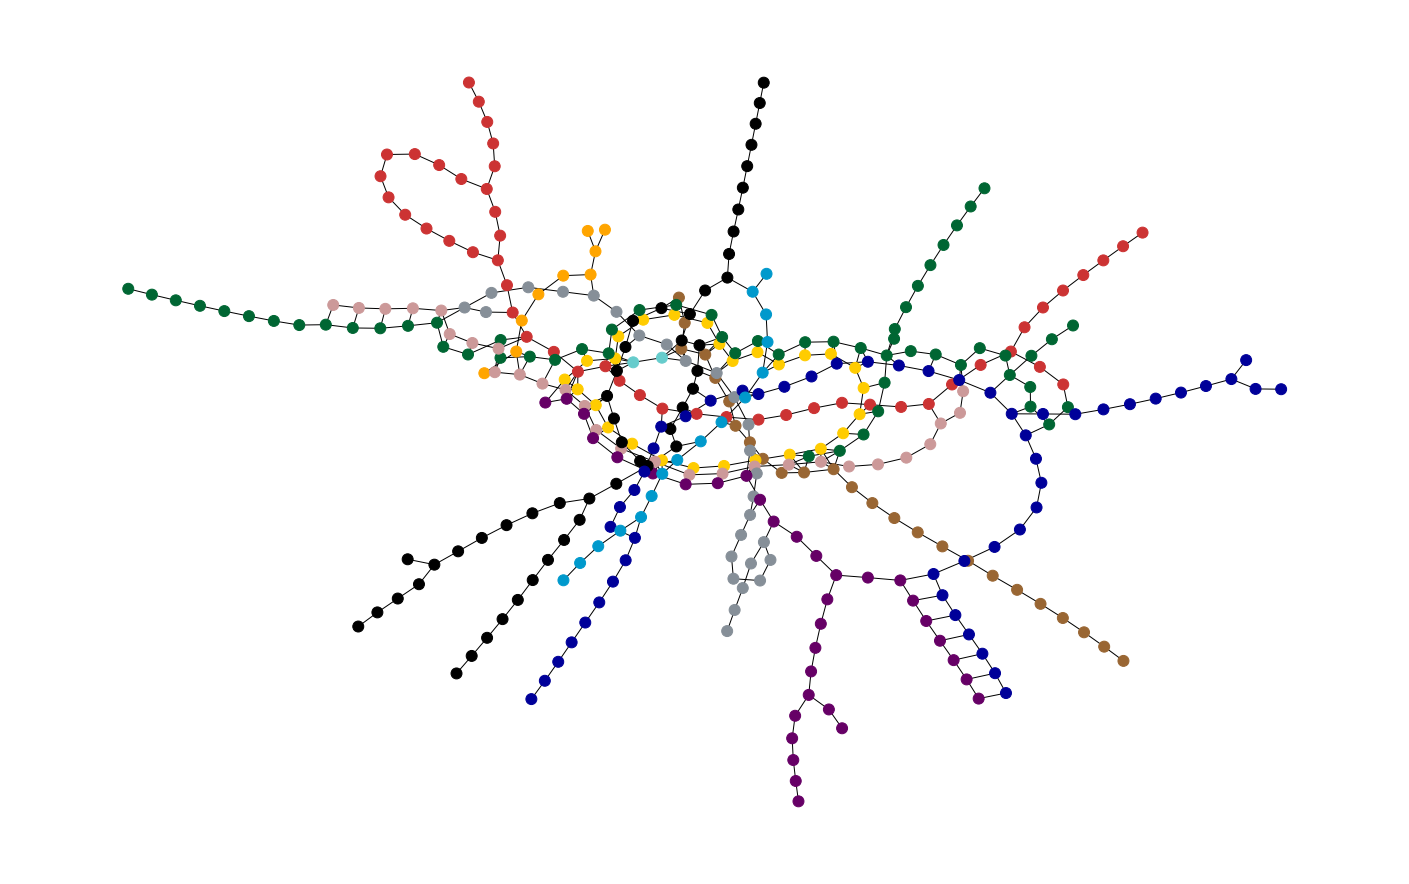

In [99]:
fig, ax = plt.subplots(figsize=(25,16))

nx.draw_kamada_kawai(G2, node_size=120, node_color = colors.values)

# Define Start and Goal state

In [315]:
start = "West Ruislip"
goal = "Epping"

In [306]:
common = list(set(dicx[start]).intersection(set(dicx[goal])))
if len(common)>0:
    correct_line_start = common[0]
    correct_line_end = common[0]
else:
    correct_line_start = dicx[start][0]
    correct_line_end = dicx[goal][0]
    
start = start + '_' + correct_line_start
goal = goal + '_' + correct_line_end

# UCS Vanilla

In [307]:
open_list = PriorityQueue()

open_list.put((0, start, [start]))

closed_list = set()  # we use a set here to ensure no repeated entries

In [308]:
nodes_expanded = 0
while not open_list.empty():

    node = open_list.get()
    while(node[1] in closed_list):
        node = open_list.get()

    if node[1] == goal:
        print('\n=============================================================')
        print('Found solution!')
        print('Path from %s to %s' % (start, goal))
        print('Total cost of %d' % node[0])    
        print( 'Final path: ', node[2])
        print("Nodes Expanded -->", nodes_expanded)
        print('=============================================================')
        
        break

    closed_list.add(node[1])
    #print(node[2])

    for s in G2[node[1]]:
        temp = node[2].copy()
        temp.append(s)
        open_list.put(((node[0] + int(G2[node[1]][s]['time'])), s, temp))
    nodes_expanded += 1


Found solution!
Path from West Ruislip_Central to Epping_Central
Total cost of 78
Final path:  ['West Ruislip_Central', 'Ruislip Gardens_Central', 'South Ruislip_Central', 'Northolt_Central', 'Greenford_Central', 'Perivale_Central', 'Hanger Lane_Central', 'North Acton_Central', 'East Acton_Central', 'White City_Central', "Shepherd's Bush_Central", 'Holland Park_Central', 'Notting Hill Gate_Central', 'Queensway_Central', 'Lancaster Gate_Central', 'Marble Arch_Central', 'Bond Street_Central', 'Oxford Circus_Central', 'Tottenham Court Road_Central', 'Holborn_Central', 'Chancery Lane_Central', "St. Paul's_Central", 'Bank/Monument_Central', 'Liverpool Street_Central', 'Bethnal Green_Central', 'Mile End_Central', 'Stratford_Central', 'Leyton_Central', 'Leytonstone_Central', 'Snaresbrook_Central', 'South Woodford_Central', 'Woodford_Central', 'Buckhurst Hill_Central', 'Loughton_Central', 'Debden_Central', 'Theydon Bois_Central', 'Epping_Central']
Nodes Expanded --> 373


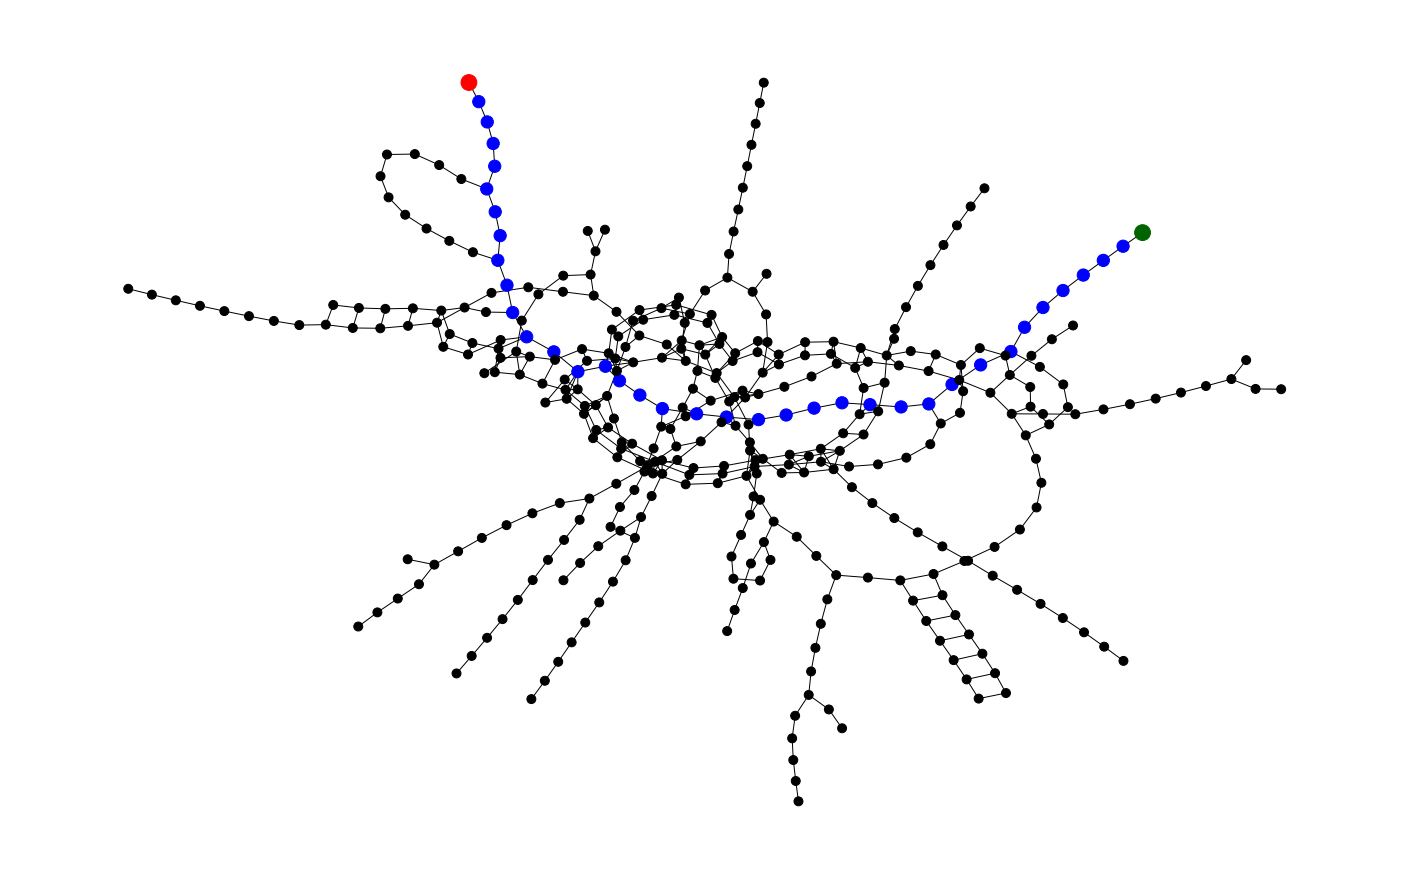

In [309]:
plot_path(G2, node[2])

# UCS + 5 mins for line change

In [310]:
open_list = PriorityQueue()

open_list.put((0, start, [start], []))

closed_list = set()  # we use a set here to ensure no repeated entries

nodes_expanded = 0

In [311]:
nodes_expanded = 0
while not open_list.empty():
    
    node = open_list.get()
    while(node[1] in closed_list):
        node = open_list.get()
    
    if node[1] == goal:
        print('\n=============================================================')
        print('Found solution!')
        print('Path from %s to %s' % (start, goal))
        print('Total cost of %d' % node[0])    
        print( 'Final path: ', node[2])
        print( 'Line path: ', node[3])
        print("Nodes Expanded -->", nodes_expanded)
        print('=============================================================')
        
        break
    
    
    closed_list.add(node[1])

    for s in G2[node[1]]:
        temp = node[2].copy()
        temp.append(s)
        temp2 = node[3].copy()
        temp2.append(G2[node[1]][s]['line'])

        extra_time = 0
        if len(temp2) > 1:
            if temp2[-1] != temp2[-2]:
                extra_time = 5

        open_list.put(((int(node[0]) + int(G2[node[1]][s]['time']) + int(extra_time)), s, temp, temp2))
    nodes_expanded += 1


Found solution!
Path from West Ruislip_Central to Epping_Central
Total cost of 78
Final path:  ['West Ruislip_Central', 'Ruislip Gardens_Central', 'South Ruislip_Central', 'Northolt_Central', 'Greenford_Central', 'Perivale_Central', 'Hanger Lane_Central', 'North Acton_Central', 'East Acton_Central', 'White City_Central', "Shepherd's Bush_Central", 'Holland Park_Central', 'Notting Hill Gate_Central', 'Queensway_Central', 'Lancaster Gate_Central', 'Marble Arch_Central', 'Bond Street_Central', 'Oxford Circus_Central', 'Tottenham Court Road_Central', 'Holborn_Central', 'Chancery Lane_Central', "St. Paul's_Central", 'Bank/Monument_Central', 'Liverpool Street_Central', 'Bethnal Green_Central', 'Mile End_Central', 'Stratford_Central', 'Leyton_Central', 'Leytonstone_Central', 'Snaresbrook_Central', 'South Woodford_Central', 'Woodford_Central', 'Buckhurst Hill_Central', 'Loughton_Central', 'Debden_Central', 'Theydon Bois_Central', 'Epping_Central']
Line path:  ['Central', 'Central', 'Central',

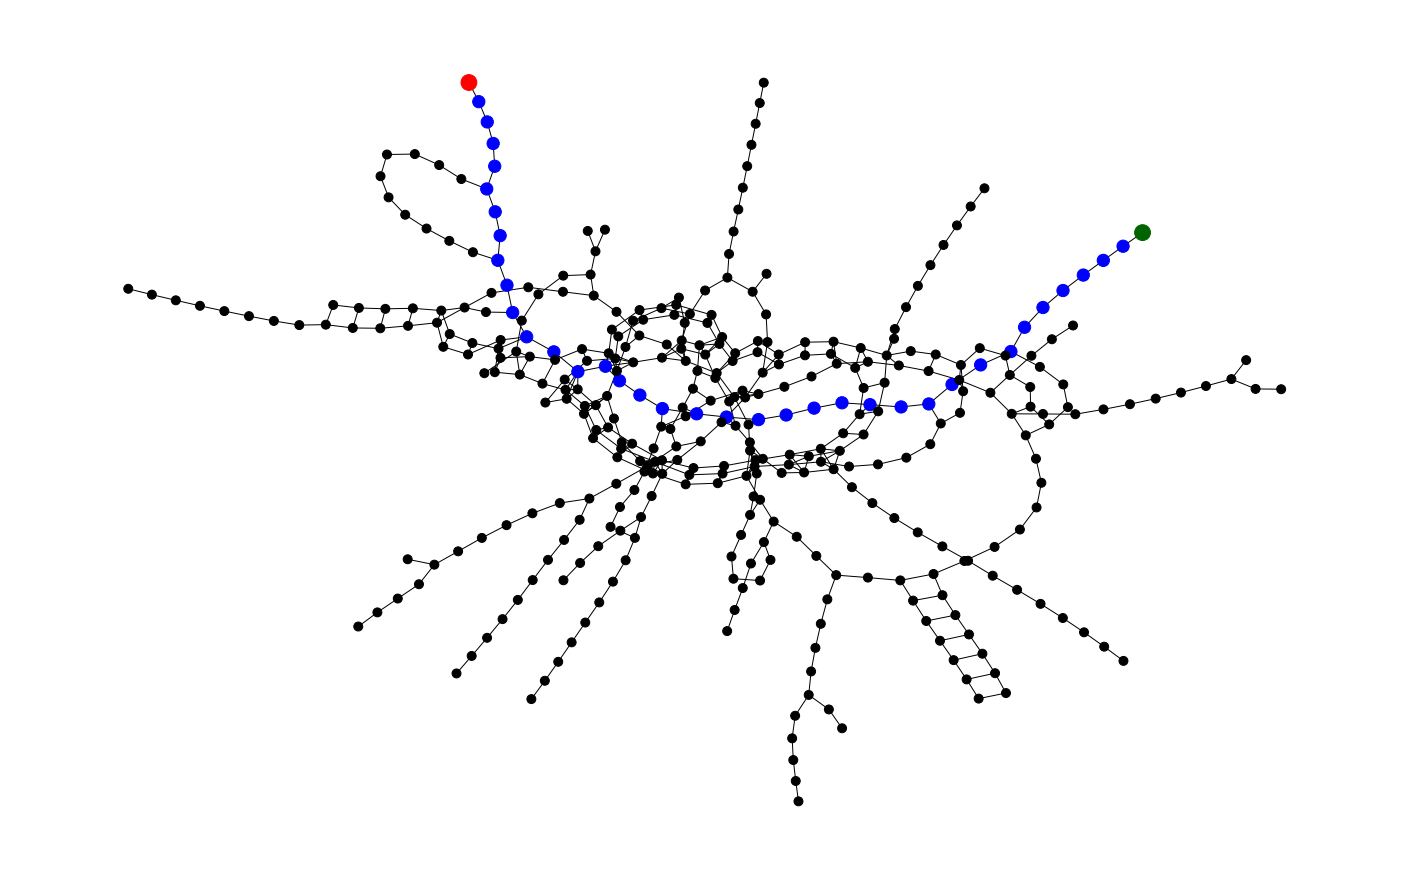

In [312]:
plot_path(G2, node[2])